In [93]:
%pip install selenium


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [94]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')


In [95]:
df = pd.read_csv('data/phishing_site_urls.csv')
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [96]:
df.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [98]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [99]:
label_counts = df.Label.value_counts()

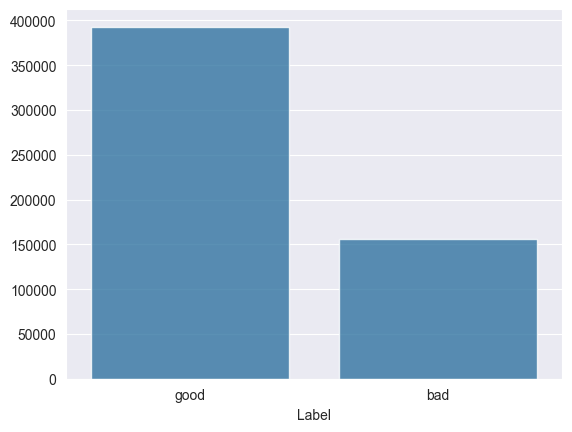

In [100]:

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.show()



In [101]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [102]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [103]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [104]:
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.3138924000086263 sec


In [105]:
df.sample(5)

,URL,Label,text_tokenized
427789,schoolfinder.com/schools/programDetail.asp?Pro...,good,"[schoolfinder, com, schools, programDetail, as..."
530524,wnmcnbmylygya.click/upload/_dispatch.php,bad,"[wnmcnbmylygya, click, upload, dispatch, php]"
377957,linkpendium.com/genealogy/USA/OH/Allen/,good,"[linkpendium, com, genealogy, USA, OH, Allen]"
347176,goodsamclub.com/travel/campgroundsandrvparks/S...,good,"[goodsamclub, com, travel, campgroundsandrvpar..."
501081,thb-berlin.homepage.t-online.de/g76gyui,bad,"[thb, berlin, homepage, t, online, de, g, gyui]"


In [106]:

stemmer = SnowballStemmer("english")

In [107]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 60.20679630001541 sec


In [108]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed
92377,www3.sympatico.ca/s_patterson/gd2002/,good,"[www, sympatico, ca, s, patterson, gd]","[www, sympatico, ca, s, patterson, gd]"
187039,fastertruck.com/pages/Quebec-Truck-Stops-Trave...,good,"[fastertruck, com, pages, Quebec, Truck, Stops...","[fastertruck, com, page, quebec, truck, stop, ..."
117280,mexusb.com/administrator/09091212.html,bad,"[mexusb, com, administrator, html]","[mexusb, com, administr, html]"
314532,digparty.com/wiki/Kristi_Myst,good,"[digparty, com, wiki, Kristi, Myst]","[digparti, com, wiki, kristi, myst]"
431588,sjihc.org/,good,"[sjihc, org]","[sjihc, org]"
252585,uk.ask.com/wiki/Ron_Lancaster,good,"[uk, ask, com, wiki, Ron, Lancaster]","[uk, ask, com, wiki, ron, lancast]"
219522,names.whitepages.com/jeanne/richards,good,"[names, whitepages, com, jeanne, richards]","[name, whitepag, com, jeann, richard]"
520717,183.78.169.5:443/search.php,bad,"[search, php]","[search, php]"
53829,members.tripod.com/jacobs29/,good,"[members, tripod, com, jacobs]","[member, tripod, com, jacob]"
478230,youtube.com/watch?v=ufjN1Gg1V9I,good,"[youtube, com, watch, v, ufjN, Gg, V, I]","[youtub, com, watch, v, ufjn, gg, v, i]"


In [109]:
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.366831400024239 sec


In [110]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
54253,management.about.com/cs/benchmarking/a/Benchma...,good,"[management, about, com, cs, benchmarking, a, ...","[manag, about, com, cs, benchmark, a, benchmar...",manag about com cs benchmark a benchmark htm
142080,amirault.8k.com/p000000h.htm,good,"[amirault, k, com, p, h, htm]","[amirault, k, com, p, h, htm]",amirault k com p h htm
269306,acronymfinder.com/Cell-Broadband-Engine-(trade...,good,"[acronymfinder, com, Cell, Broadband, Engine, ...","[acronymfind, com, cell, broadband, engin, tra...",acronymfind com cell broadband engin trademark...
344511,gatorweather.com/,good,"[gatorweather, com]","[gatorweath, com]",gatorweath com
121497,boyom.wpwithus.com/dropbox/Dropbox/index.htm,bad,"[boyom, wpwithus, com, dropbox, Dropbox, index...","[boyom, wpwithus, com, dropbox, dropbox, index...",boyom wpwithus com dropbox dropbox index htm
420436,rbinspirations.co.uk/,good,"[rbinspirations, co, uk]","[rbinspir, co, uk]",rbinspir co uk
230575,politicalgraveyard.com/bio/chandless-chapline....,good,"[politicalgraveyard, com, bio, chandless, chap...","[politicalgraveyard, com, bio, chandless, chap...",politicalgraveyard com bio chandless chaplin html
489907,rediscovermillerspoint.com.au/,bad,"[rediscovermillerspoint, com, au]","[rediscovermillerspoint, com, au]",rediscovermillerspoint com au
430911,sidereel.com/Sonny_With_a_Chance,good,"[sidereel, com, Sonny, With, a, Chance]","[sidereel, com, sonni, with, a, chanc]",sidereel com sonni with a chanc
515953,tierastyle.co.uk/dmp/panel/admin.php,bad,"[tierastyle, co, uk, dmp, panel, admin, php]","[tierastyl, co, uk, dmp, panel, admin, php]",tierastyl co uk dmp panel admin php


In [111]:
#sliceing classes
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [112]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [113]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [114]:
bad_sites.Label.value_counts()

Label
bad    156422
Name: count, dtype: int64

In [115]:
good_sites.Label.value_counts()

Label
good    392924
Name: count, dtype: int64

In [116]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [117]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

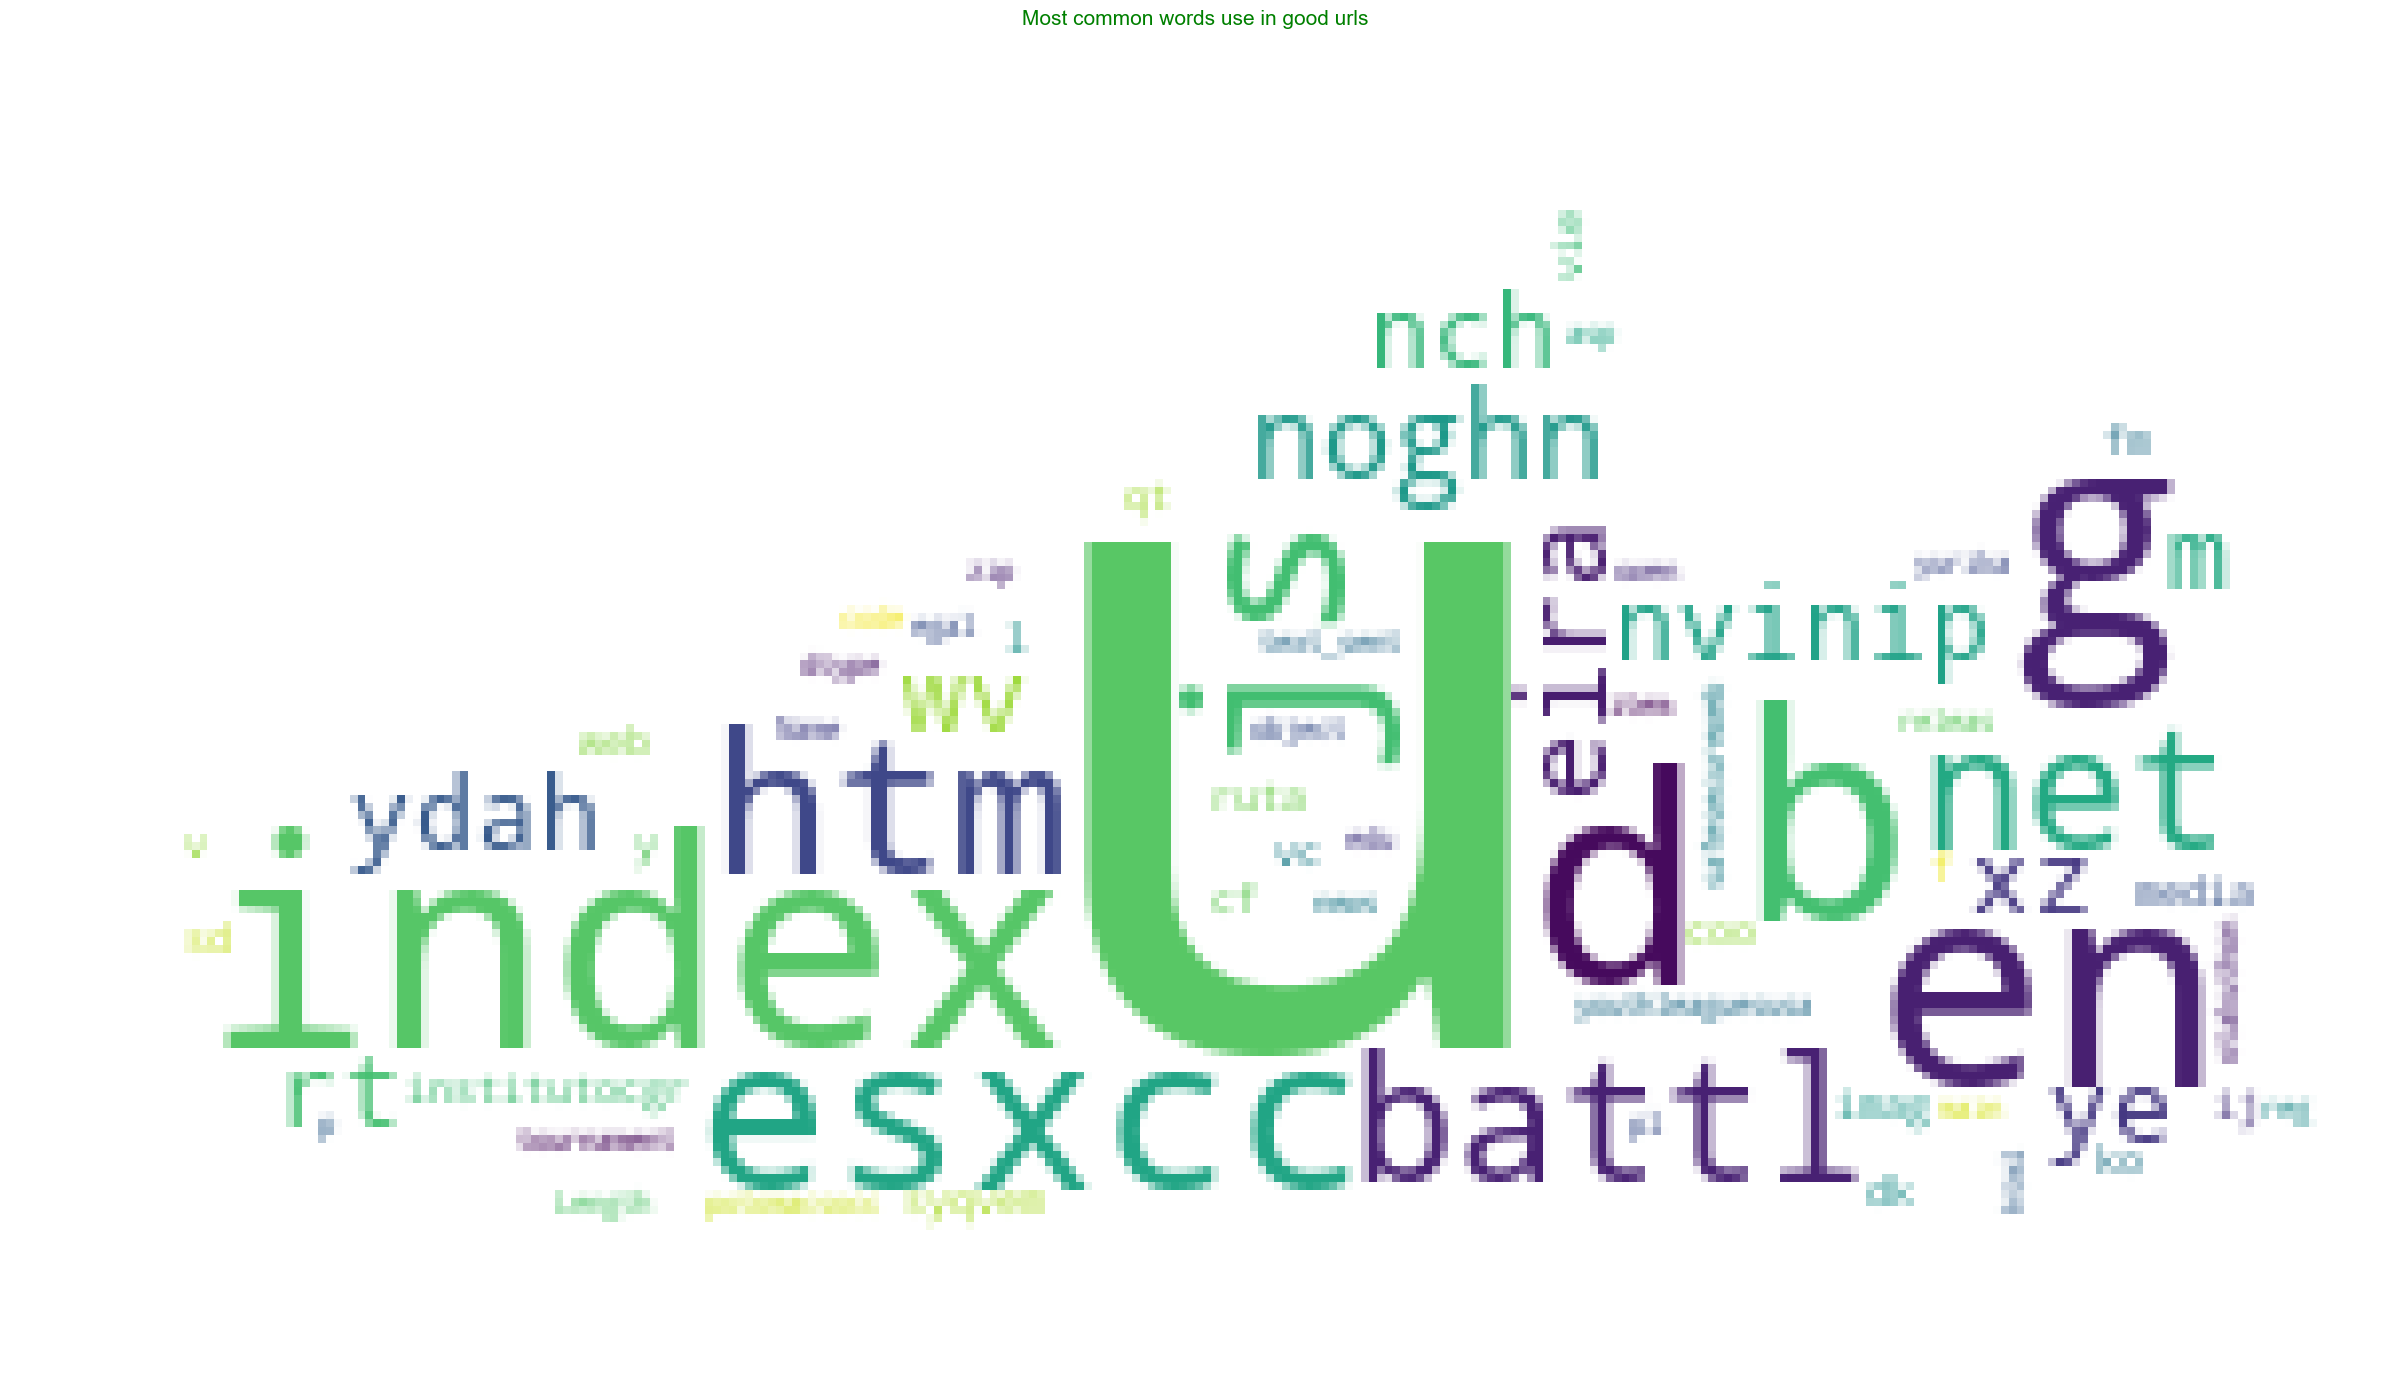

In [118]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\OneDrive\Pictures\images.jpg'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title='Most common words use in good urls', title_size=15)

In [119]:

data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

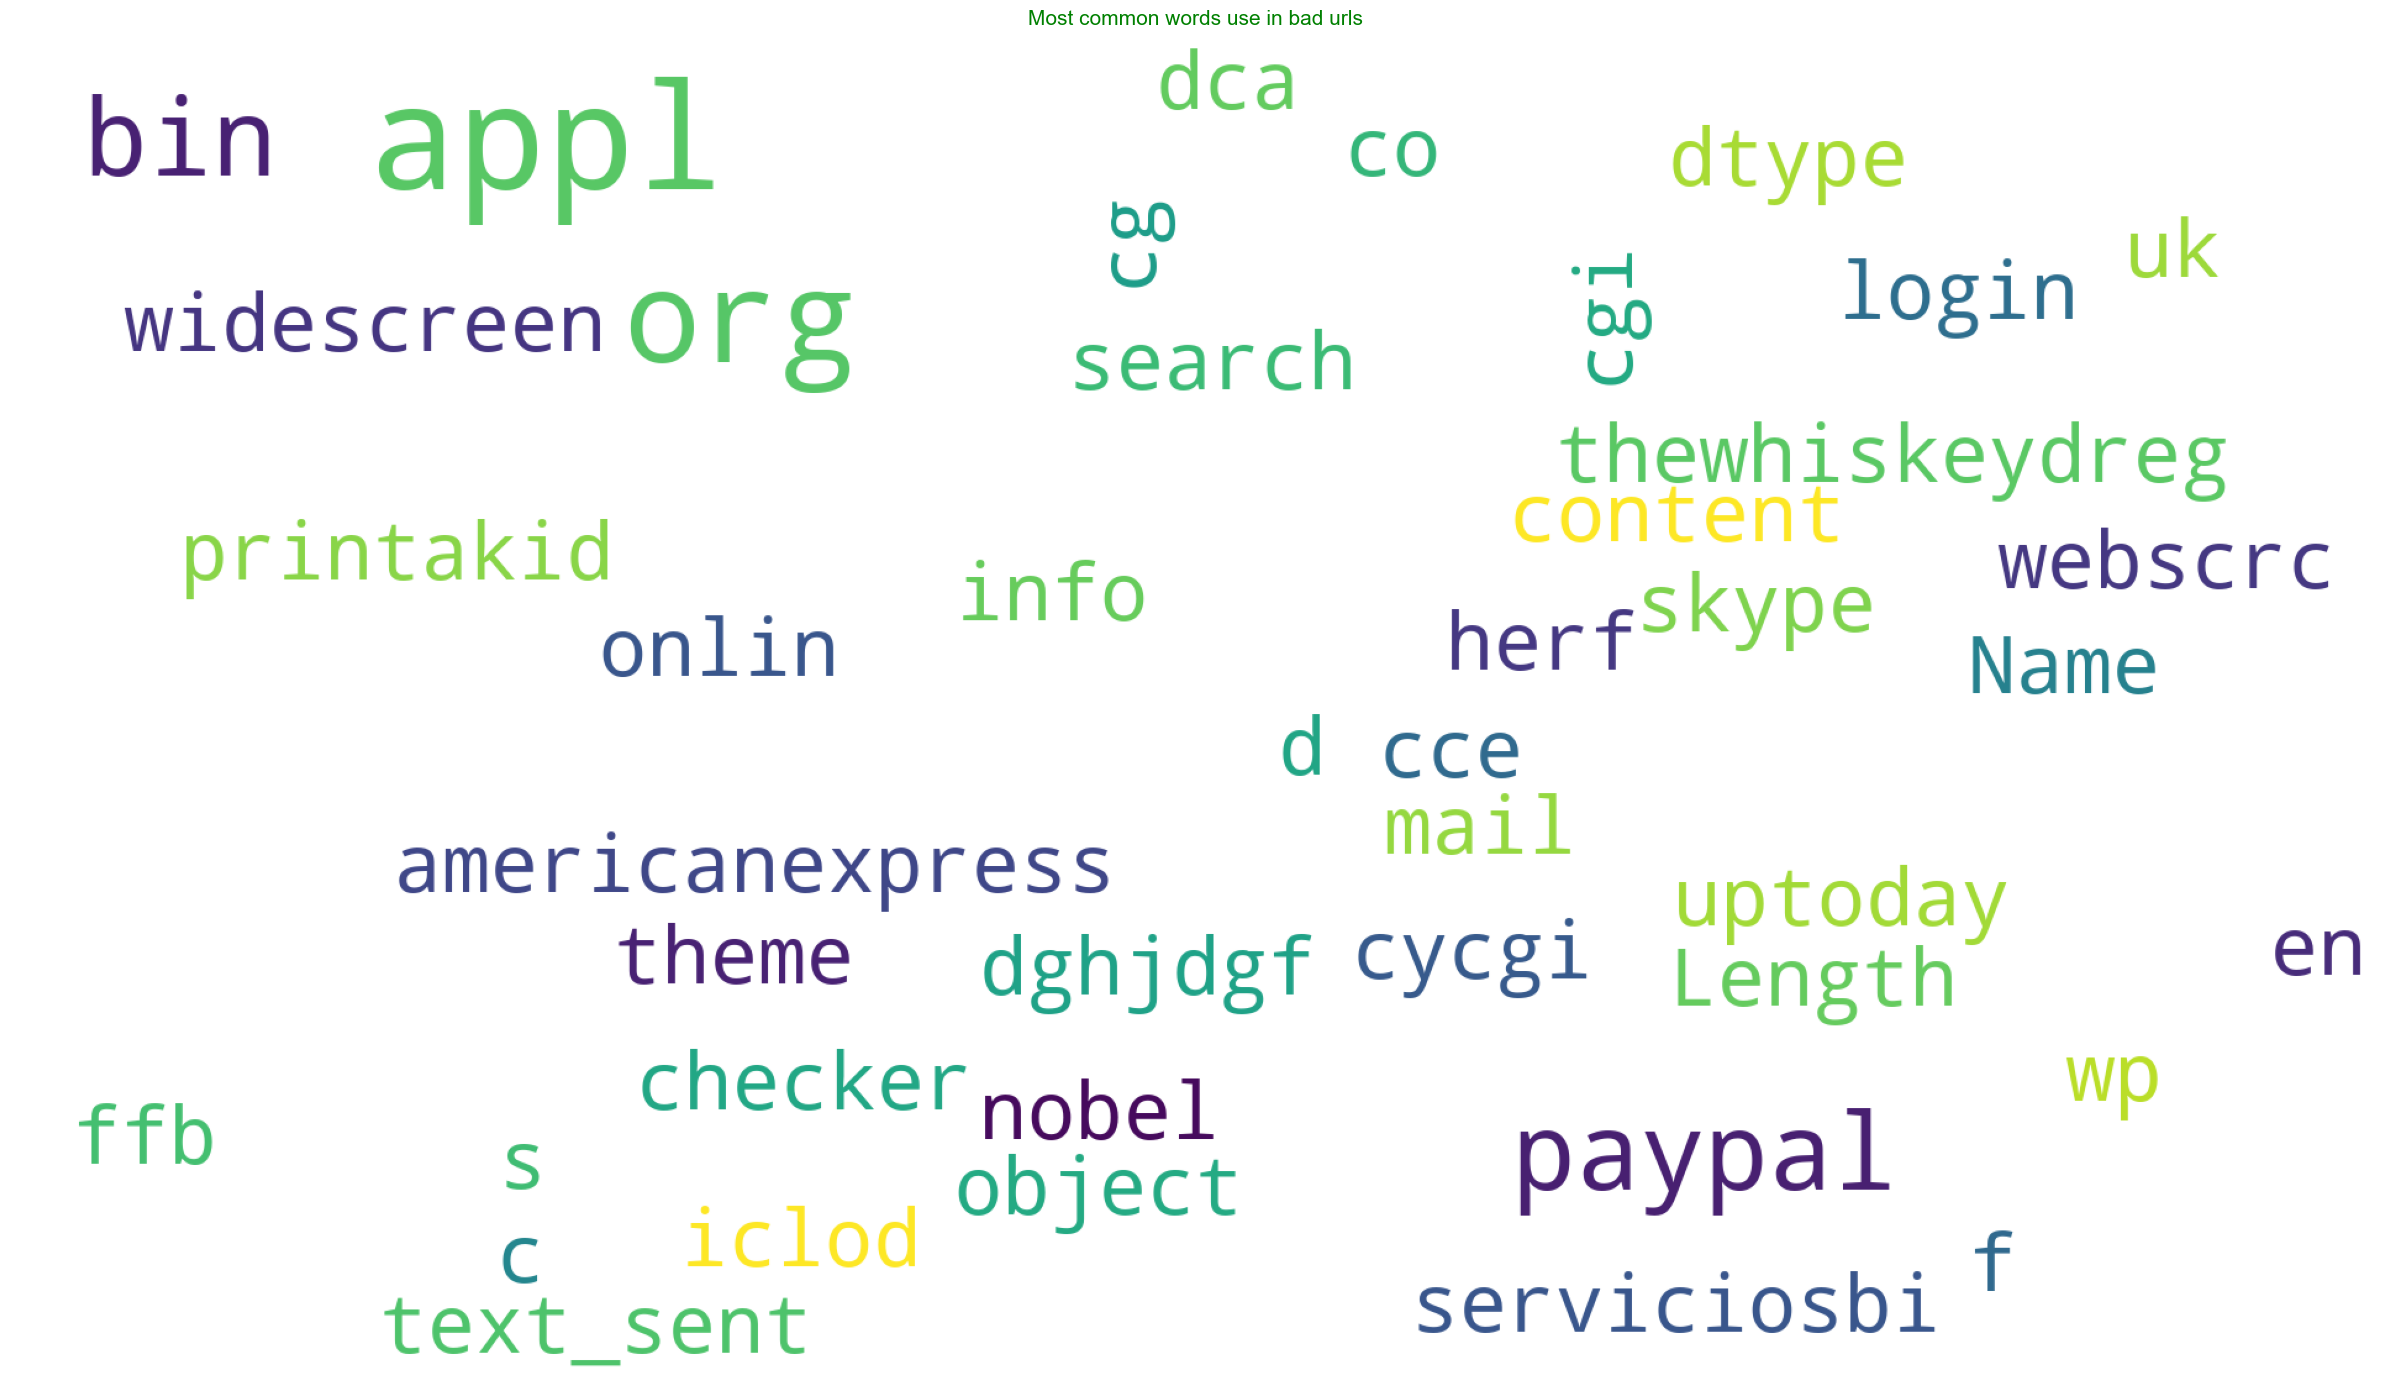

In [120]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\OneDrive\Pictures\wallpaper1.jpeg'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

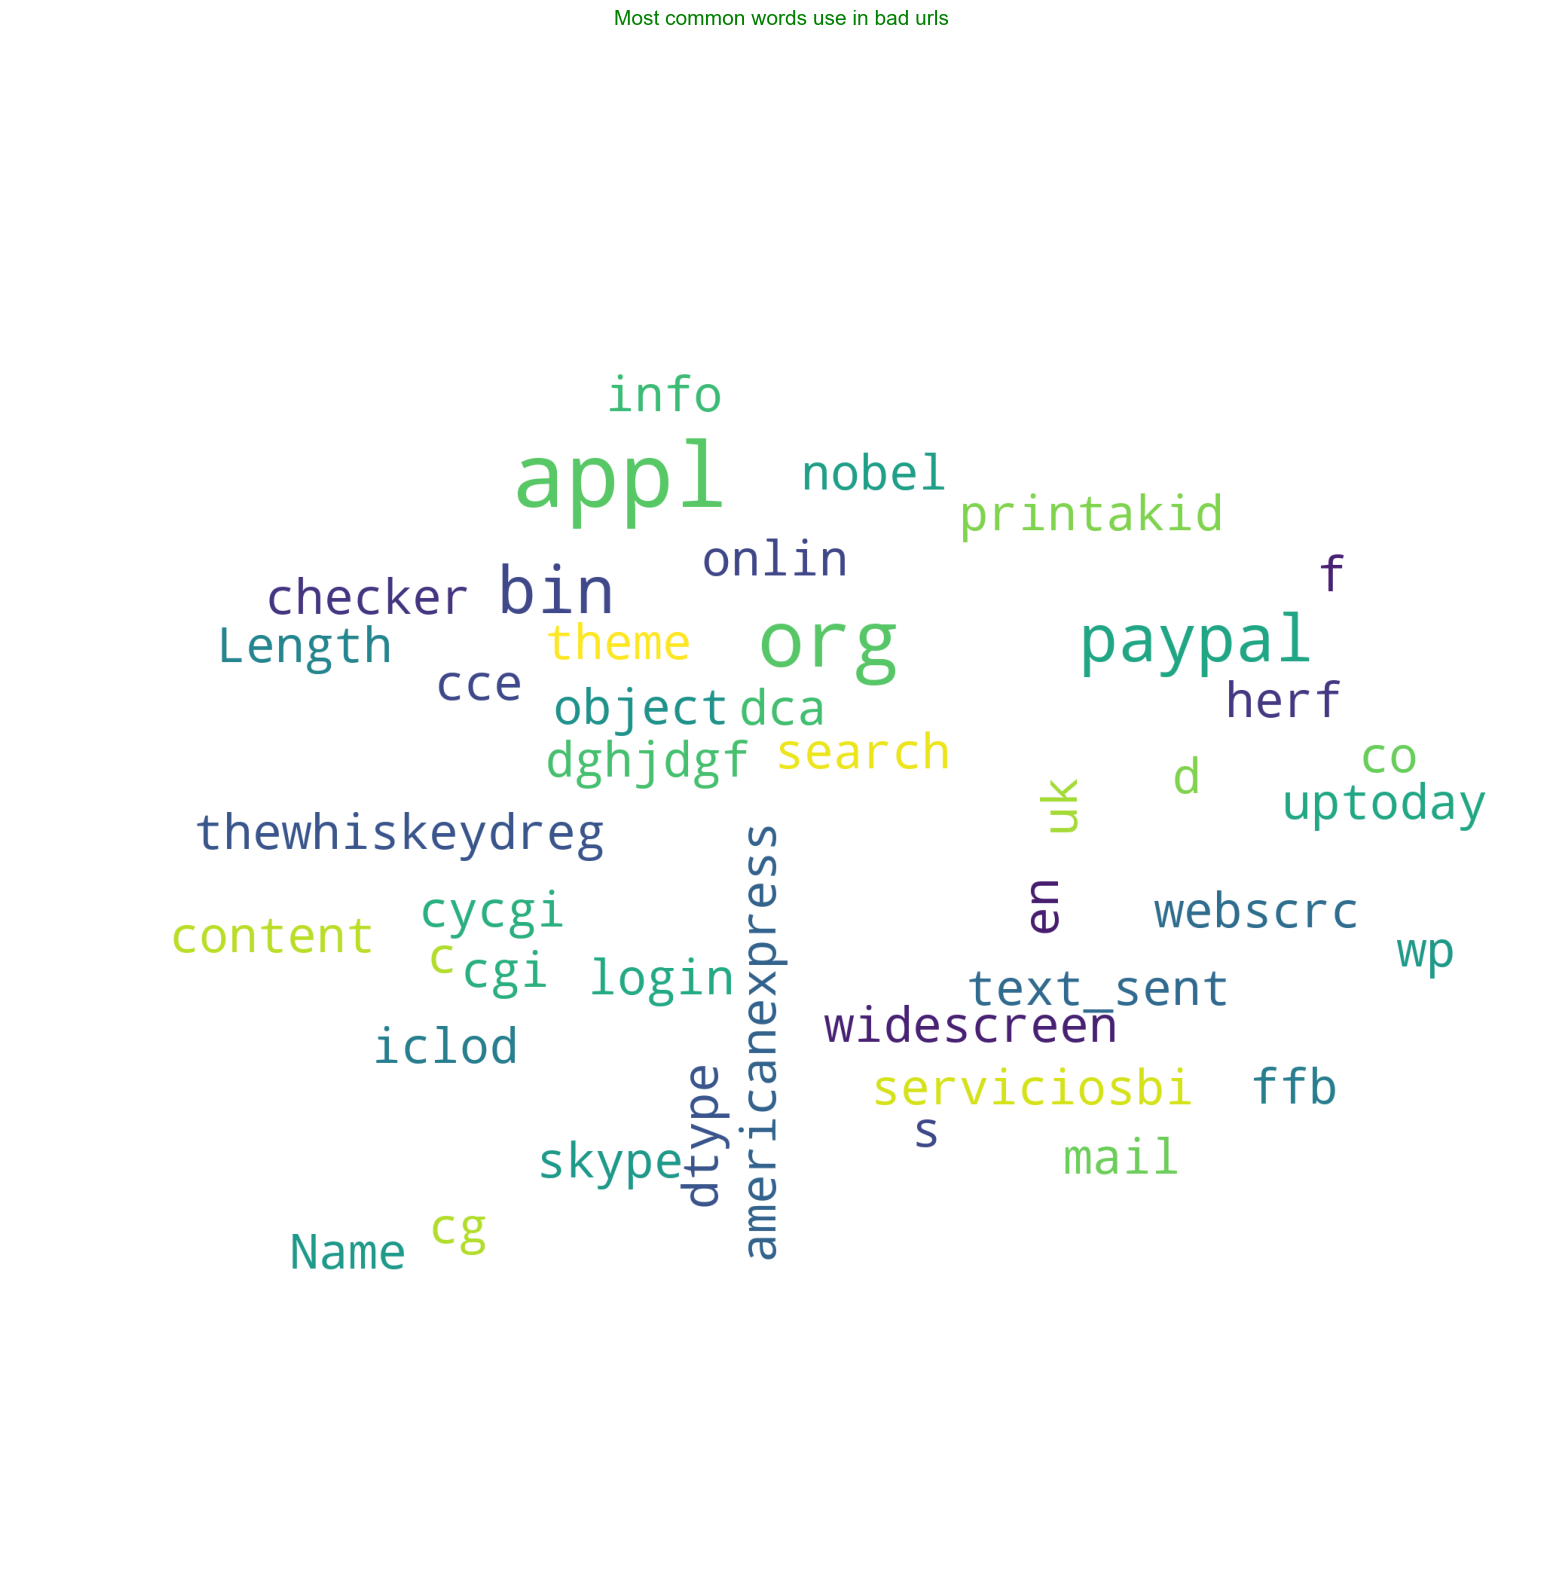

In [133]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\Downloads\comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

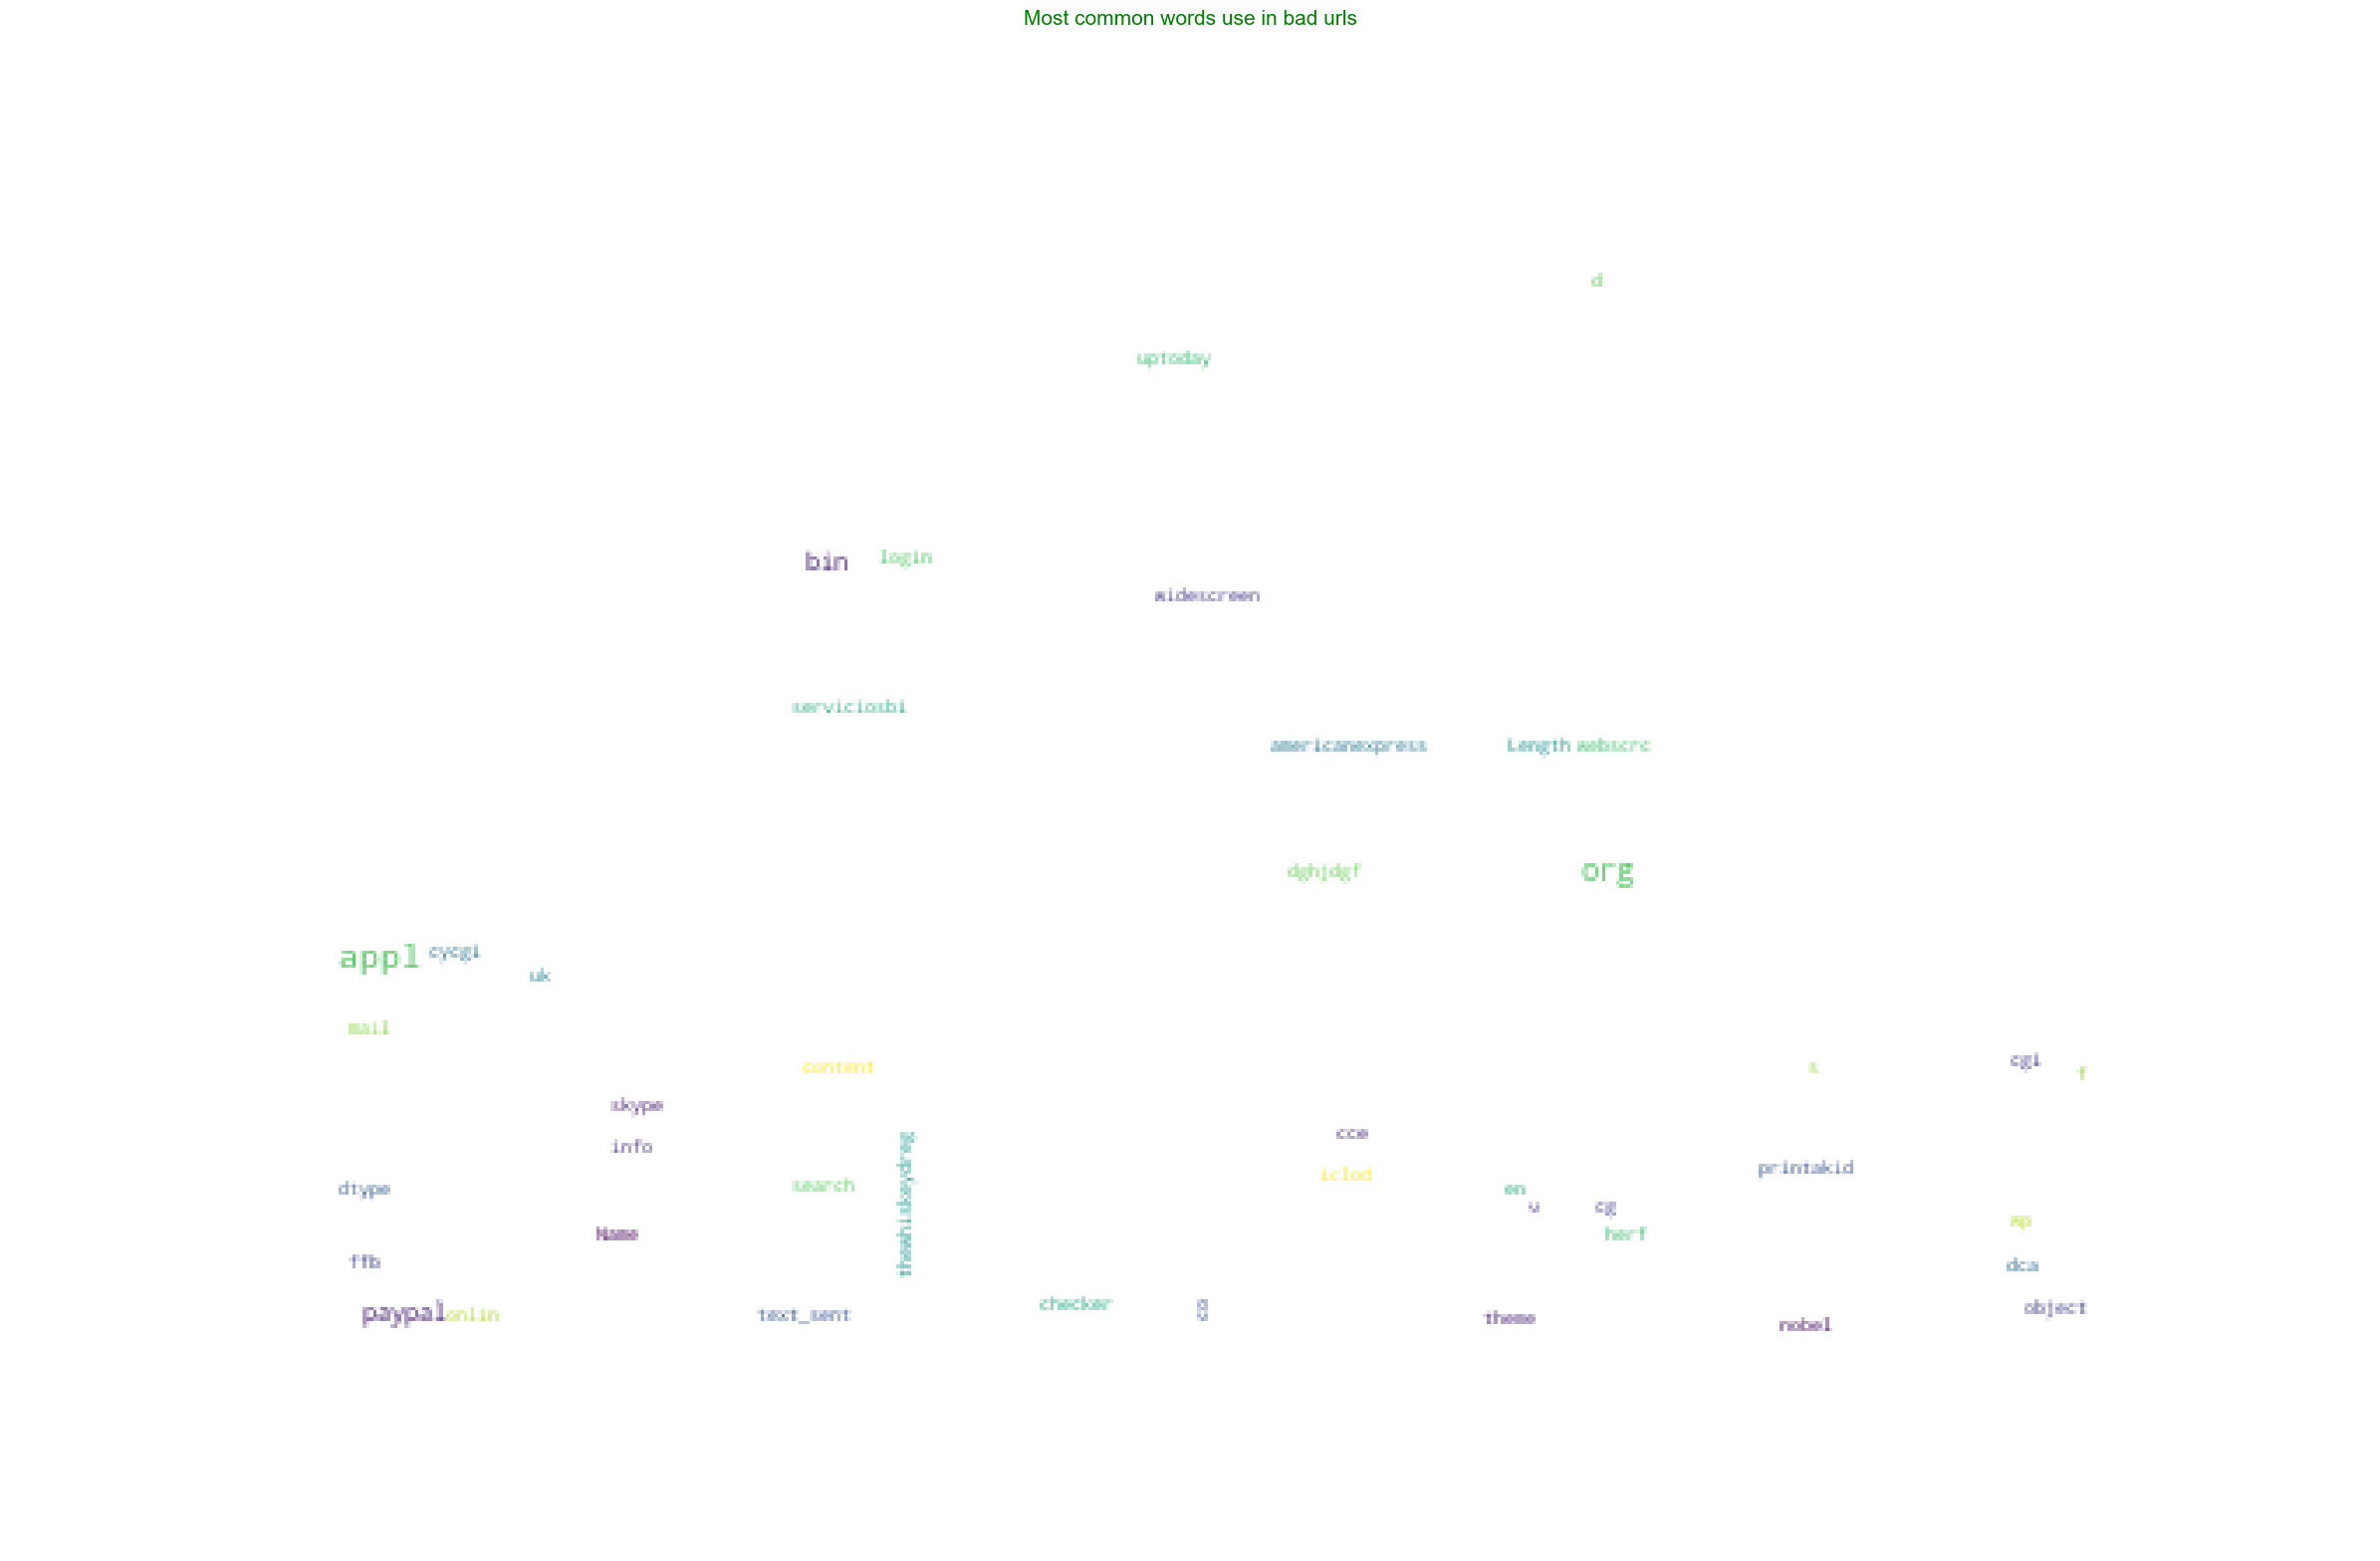

In [124]:
common_text = str(data)
import requests
from io import BytesIO

# Fetch the image from the URL
url = 'https://github.com/taruntiwarihp/raw_images/blob/master/Words%20cloud%20images/cloud-1.png?raw=true'
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Open the image using BytesIO
common_mask = np.array(Image.open(BytesIO(response.content)))

# Plot the word cloud
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title='Most common words use in bad urls', title_size=15)

In [125]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.common.exceptions import WebDriverException

# Specify the path to the ChromeDriver executable
service = Service(r"chromedriver.exe")
# options = Options()
# options.add_argument("--headless")  # Run without GUI
browser = webdriver.Chrome(service=service, )

In [126]:
list_urls = ['https://www.weeniebreedershome.com', 'https://www.davidminidachshundhaven.com','https://www.laurasdoodles.online']
links_with_text = []

In [127]:
for url in list_urls:
    try:
        browser.get(url)
        soup = BeautifulSoup(browser.page_source, "html.parser")
        for line in soup.find_all('a'):
            href = line.get('href')
            links_with_text.append([url, href])
    except WebDriverException as e:
        print(f"Error accessing {url}: {e}")

In [128]:
df1 = pd.DataFrame(links_with_text, columns=["from", "to"])

In [134]:
df1.head()

,from,to
0,https://www.weeniebreedershome.com,#page-top
1,https://www.weeniebreedershome.com,index-2.html
2,https://www.weeniebreedershome.com,about.html
3,https://www.weeniebreedershome.com,available.html
4,https://www.weeniebreedershome.com,health.html


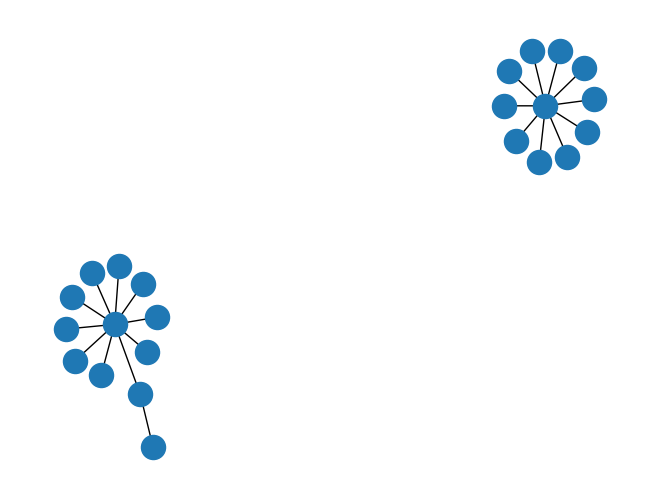

In [130]:
GA = nx.from_pandas_edgelist(df1, source="from", target="to")
nx.draw(GA, with_labels=False)

In [131]:

#create cv object
cv = CountVectorizer()

In [ ]:
# help(CountVectorizer())

In [132]:

feature = cv.fit_transform(df['text_sent'])

In [135]:
if 'text_sent' not in df1.columns:
    print("Column 'text_sent' does not exist. Generating it from 'to' column...")
    df1['text_sent'] = df1['to'].apply(lambda x: x.lower() if isinstance(x, str) else '')

cv = CountVectorizer()
feature = cv.fit_transform(df1['text_sent'])

print("Feature matrix:\n", feature.toarray())

Column 'text_sent' does not exist. Generating it from 'to' column...
Feature matrix:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [136]:

feature = cv.fit_transform(df.text_sent)

In [137]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [138]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

In [139]:
lr = LogisticRegression()

In [140]:
lr.fit(trainX,trainY)

LogisticRegression()

In [141]:
lr.score(testX,testY)

0.9651514158602562

In [142]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9798062663679676
Testing Accuracy : 0.9651514158602562

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36499
        Good       0.99      0.96      0.98    100838

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

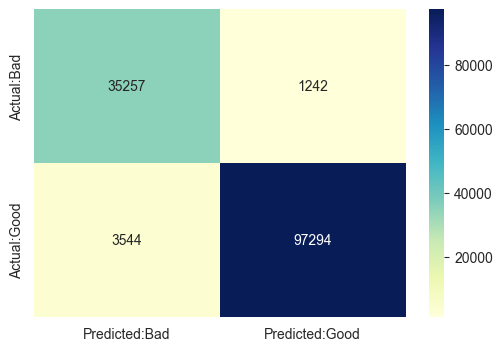

In [143]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [144]:
# create mnb object
mnb = MultinomialNB()

In [145]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [146]:
mnb.score(testX,testY)

0.9579574331753279

In [147]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.973947171056943
Testing Accuracy : 0.9579574331753279

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.93      0.92     38021
        Good       0.97      0.97      0.97     99316

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

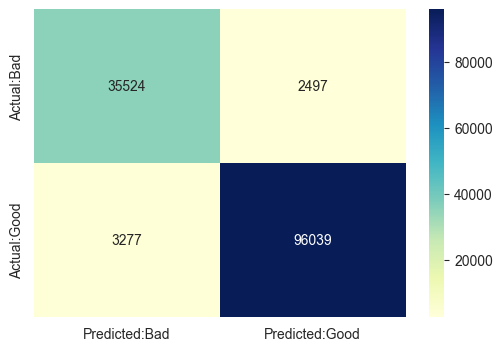

In [148]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

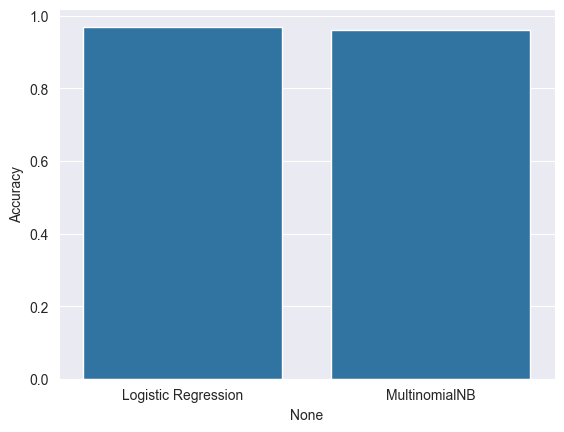

In [149]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

In [150]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [151]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [152]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [153]:
pipeline_ls.score(testX,testY)

0.9680858035343717

Training Accuracy : 0.9804907174357842
Testing Accuracy : 0.9680858035343717

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     37223
        Good       0.99      0.97      0.98    100114

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

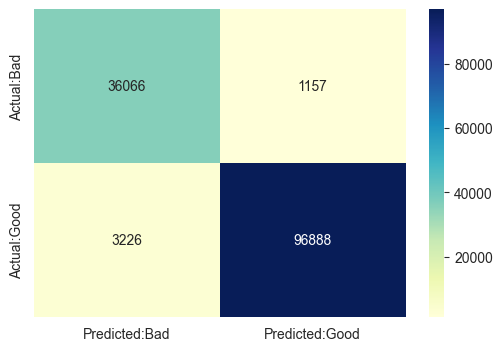

In [154]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [158]:
pickle.dump(pipeline_ls,open('model/phishing.pkl','wb'))

In [159]:
loaded_model = pickle.load(open('model/phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9680858035343717


* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
(https://www.awesomepets-sa.com)
(https://www.laurasdoodles.online)
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [161]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','https://www.definncu.com','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt','https://www.myfurryfriendpuppies.com','https://www.davidminidachshundhaven.com']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','fazan-pacir.rs/temp/libraries/ipad','restorevisioncenters.com/html/technology.html', 'https://www.geeksforgeeks.org/problems/alien-dictionary/1', 'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction']
loaded_model = pickle.load(open('model/phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("-"*50)
print(result2)

['bad' 'bad' 'bad' 'bad' 'bad' 'bad']
--------------------------------------------------
['good' 'good' 'bad' 'good' 'good' 'good']


In [62]:
import pickle

# Save model
with open('model/phishing_model.pkl', 'wb') as file:
    pickle.dump(pipeline_ls, file)

# Save vectorizer
with open('model/vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)


In [63]:
from urllib.parse import urlparse
import re

def url_tokenizer(url):
    tokens = []
    parsed = urlparse(url)
    
    # Add domain, path, etc.
    tokens.extend(parsed.netloc.split('.'))
    tokens.extend(parsed.path.split('/'))
    tokens.extend(parsed.query.split('&'))
    
    # Extract other patterns
    tokens.extend(re.findall(r'[a-z]+', url.lower()))
    tokens.extend(re.findall(r'\d+', url))
    
    return [token for token in tokens if token and token != 'com']


In [64]:
pipeline_ls = make_pipeline(
    CountVectorizer(tokenizer=url_tokenizer, stop_words='english'),
    LogisticRegression()
)




Training Accuracy : 0.9916332177411281
Testing Accuracy : 0.9748794029307363

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.95     31200
        Good       0.97      0.99      0.98     78670

    accuracy                           0.97    109870
   macro avg       0.98      0.96      0.97    109870
weighted avg       0.97      0.97      0.97    109870



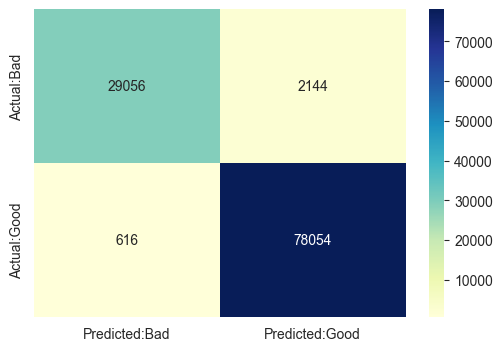

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

trainX, testX, trainY, testY = train_test_split(df.URL, df.Label, test_size=0.2, random_state=42)

pipeline_ls.fit(trainX, trainY)

print('Training Accuracy :', pipeline_ls.score(trainX, trainY))
print('Testing Accuracy :', pipeline_ls.score(testX, testY))

con_mat = pd.DataFrame(
    confusion_matrix(testY, pipeline_ls.predict(testX)),
    columns=['Predicted:Bad', 'Predicted:Good'],
    index=['Actual:Bad', 'Actual:Good']
)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(testY, pipeline_ls.predict(testX), target_names=['Bad', 'Good']))

plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

# Save model
pickle.dump(pipeline_ls, open('phishing.pkl', 'wb'))



In [66]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

predict_bad = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'youtube.com/',
    'https://www.definncu.com',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
    'https://www.myfurryfriendpuppies.com',
    'https://www.davidminidachshundhaven.com'
]

predict_good = [
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html',
    'https://www.geeksforgeeks.org/problems/alien-dictionary/1',
    'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction'
]

result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

print(result_bad)
print("*" * 30)
print(result_good)


['bad' 'good' 'bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good' 'good' 'good']


In [67]:
# If using a separate CountVectorizer instead of pipeline
vectorizer = CountVectorizer(tokenizer=url_tokenizer, stop_words='english')
vectorizer.fit(df.URL)

with open('model/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [82]:
import re
from urllib.parse import urlparse

def extract_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path

    features = {}

    # Length-based features
    features['url_length'] = len(url)
    features['hostname_length'] = len(domain)
    features['path_length'] = len(path)
    features['count_dots'] = url.count('.')
    features['count_hyphens'] = url.count('-')
    features['count_at'] = url.count('@')
    features['count_slash'] = url.count('/')
    features['count_question'] = url.count('?')
    features['count_equals'] = url.count('=')
    features['count_percent'] = url.count('%')
    features['count_http'] = url.lower().count('http')
    features['count_https'] = url.lower().count('https')

    # Boolean features
    features['has_https'] = 1 if parsed.scheme == 'https' else 0
    features['has_ip'] = 1 if re.fullmatch(r'(\d{1,3}\.){3}\d{1,3}', domain) else 0
    features['has_www'] = 1 if 'www' in url else 0
    features['has_login'] = 1 if 'login' in url.lower() else 0
    features['has_admin'] = 1 if 'admin' in url.lower() else 0
    features['has_secure'] = 1 if 'secure' in url.lower() else 0

    # Position-based features
    features['is_shortened'] = 1 if re.search(r'(bit\.ly|tinyurl\.com|goo\.gl|ow\.ly|t\.co)', domain) else 0

    return features


In [83]:
df_features = df.URL.apply(lambda x: pd.Series(extract_features(x)))
df_final = pd.concat([df, df_features], axis=1)


In [84]:
from sklearn.model_selection import train_test_split

X_text = df_final['URL']  # for vectorizer
# Ensure 'count_slashes' exists in df_final
if 'count_slashes' not in df_final.columns:
    df_final['count_slashes'] = df_final['URL'].apply(lambda x: x.count('/') if isinstance(x, str) else 0)

X_numeric = df_final[['url_length','hostname_length','path_length', 'count_dots', 'count_hyphens', 'count_at', 'count_slashes','count_question', 'count_equals','count_percent','count_http','count_https' ,'has_https', 'has_ip','has_www','has_login','has_admin','has_secure']]
y = df_final['Label']

X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)


In [85]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


In [86]:
class ManualFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If X is already a NumPy array, return as is
        return X  # ✅ No .values needed!


In [87]:
text_transformer = CountVectorizer(tokenizer=url_tokenizer, stop_words='english')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('manual', ManualFeatures())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'url'),
        ('num', numeric_transformer, ['url_length','hostname_length','path_length', 'count_dots', 'count_hyphens', 'count_at', 'count_slashes','count_question', 'count_equals','count_percent','count_http','count_https' ,'has_https', 'has_ip','has_www','has_login','has_admin','has_secure'])
    ]
)

final_df = pd.concat([X_text, X_numeric], axis=1)
final_df.columns = ['url'] + list(X_numeric.columns)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(final_df, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  CountVectorizer(stop_words='english',
                                                                  tokenizer=<function url_tokenizer at 0x000002433529EDE0>),
                                                  'url'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('manual',
                                                                   ManualFeatures())]),
                                                  ['url_length',
                                                   'hostname_length',
                                                   'path_length', 'count_dots',
                                                   'count_hyphens', 'count_at',
                                                   'count_slashes',
                                                   'count_question',
                                                   'count_equals',
                                                   'count_percent',
                                                   'count_http', 'count_https',
                                                   'has_https', 'has_ip',
                                                   'has_www', 'has_login',
                                                   'has_admin',
                                                   'has_secure'])])),
                ('classifier', LogisticRegression())])

In [88]:
test_df = pd.concat([X_text_test, X_num_test], axis=1)
test_df.columns = ['url'] + list(X_numeric.columns)

print('Training Accuracy:', pipeline.score(final_df, y))
print('Testing Accuracy:', pipeline.score(test_df, y_test))


Training Accuracy: 0.98427948870111
Testing Accuracy: 0.9838445435514699


In [89]:
import dill

# Save the model using dill
with open('model/phishing_model_combined.pkl', 'wb') as f:
    dill.dump(pipeline_ls, f)



In [ ]:
import dill
loaded_model = dill.load(open('model/phishing_model_combined.pkl', 'rb'))

predict_bad = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'youtube.com/',
    'https://www.definncu.com',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
    'https://www.myfurryfriendpuppies.com',
    'https://www.davidminidachshundhaven.com'
]

predict_good = [
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html',
    'https://www.vertexvistascu.com',
    'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction'
]

result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

print(result_bad)
print("*" * 30)
print(result_good)


['bad' 'good' 'bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good' 'good' 'good']
